In [53]:
# Relevant Package Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#Import Data from cluster.csv
db = pd.read_csv('cluster.csv')
db[db.duplicated(keep = False)]
db.drop_duplicates(inplace = True)

#Explore Data
db.info() #From the start, the only Attribute with missing non-null values is Year_Birth. For storytelling purposes, we should discuss how to explore the narrative here for median vs mode vs mean
db.describe() #Include in storytelling the type of clients that use all 0 or all 5. Also, check the type of clients that use 1 instead of 0, does that make sense? Is check in and Check out necessary?
db.skew()
db.kurt()
db.describe(include = ['O']) #O from object
db['RoomType'].value_counts() #cycle through Churn, Name, Longevity, TypeTravel, RoomType
#Check how many repeat visits do we have from the potential customers. (Name)
#We need to clean Longevity: yes, no and y. (Longevity)
#Churn, Longevity and TypeTravel can be Boolean

#Data Cleaning
db['Longevity'] = db['Longevity'].replace('y','yes')
db['Longevity'].value_counts() #Best practice for minimizing data usage.
db.fillna({'Year_Birth': db['Year_Birth'].median() }, inplace = True) #Changed by median 
db.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15586 non-null  object 
 1   Name               15586 non-null  object 
 2   Longevity          15586 non-null  object 
 3   Year_Birth         15391 non-null  float64
 4   TypeTravel         15586 non-null  object 
 5   RoomType           15586 non-null  object 
 6   RewardPoints       15586 non-null  int64  
 7   Comfort            15586 non-null  int64  
 8   ReceptionSchedule  15586 non-null  int64  
 9   FoodDrink          15586 non-null  int64  
 10  Location           15586 non-null  int64  
 11  Wifi               15586 non-null  int64  
 12  Amenities          15586 non-null  int64  
 13  Staff              15586 non-null  int64  
 14  OnlineBooking      15586 non-null  int64  
 15  PriceQuality       15586 non-null  int64  
 16  RoomSpace          155

C:\Users\jfred\AppData\Local\Temp/ipykernel_8780/331900573.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db.skew()
C:\Users\jfred\AppData\Local\Temp/ipykernel_8780/331900573.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db.kurt()


<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

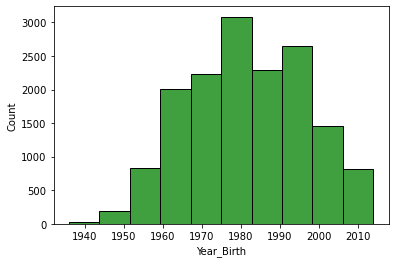

In [54]:
sns.histplot(db['Year_Birth'], color="g", bins = 10)